In [57]:
# impoting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 12, 15
import warnings; warnings.simplefilter('ignore')

In [58]:
df=pd.read_csv('Covid_19.csv')

In [59]:
df.head()

,Province,Country,Latitude,Longitude,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,28 January 2020,0,0,0
1,NaN,Albania,41.1533,20.1683,28 January 2020,0,0,0
2,NaN,Algeria,28.0339,1.6596,28 January 2020,0,0,0
3,NaN,Andorra,42.5063,1.5218,28 January 2020,0,0,0
4,NaN,Angola,-11.2027,17.8739,28 January 2020,0,0,0


In [60]:
df.shape

(18815, 8)

In [61]:
df.isna().sum()

Province     13135
Country          0
Latitude         0
Longitude        0
Date             0
Confirmed        0
Deaths           0
Recovered        0
dtype: int64

In [62]:
df.describe()

,Latitude,Longitude,Confirmed,Deaths,Recovered
count,18815.000000,18815.000000,1.881500e+04,18815.000000,18815.00000
mean,21.181891,22.881195,4.672991e+03,310.839011,1396.08642
std,24.904534,70.246295,4.250830e+04,2937.870846,10242.12485
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.00000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.00000
50%,23.634500,21.005900,1.800000e+01,0.000000,1.00000
75%,41.153300,78.000000,4.060000e+02,6.000000,98.00000
max,71.706900,178.065000,1.528568e+06,91921.000000,289392.00000


In [63]:
df.groupby('Date')['Confirmed','Deaths', 'Recovered'].sum()

,Confirmed,Deaths,Recovered
Date,,,
13 April 2020,1905157,125561,440906
13 February 2020,60368,1371,6294
13 March 2020,145223,5408,70243
13 May 2020,4347012,297197,1513280
14 April 2020,1975563,132439,465762
...,...,...,...
30 April 2020,3256905,233360,992413
30 January 2020,8234,171,143
30 March 2020,782500,39439,164100


In [64]:
df.groupby('Country')['Confirmed','Deaths', 'Recovered'].sum()

,Confirmed,Deaths,Recovered
Country,,,
Afghanistan,68297,1863,7968
Albania,19889,789,11531
Algeria,104693,11152,45825
Andorra,20927,1055,9399
Angola,812,58,218
...,...,...,...
West Bank and Gaza,9675,56,3780
Western Sahara,150,0,82
Yemen,836,127,18


In [65]:
df_per_day=df.groupby('Date')['Confirmed','Deaths', 'Recovered'].sum()

In [66]:
df_per_day.describe()

,Confirmed,Deaths,Recovered
count,7.100000e+01,71.000000,7.100000e+01
mean,1.238343e+06,82372.338028,3.699629e+05
std,1.553097e+06,108320.729357,5.110743e+05
min,5.550000e+02,17.000000,2.800000e+01
25%,7.650800e+04,2249.000000,1.853150e+04
50%,3.045800e+05,13125.000000,9.168200e+04
75%,2.436252e+06,170434.500000,6.220985e+05
max,4.897486e+06,323285.000000,1.747514e+06


In [67]:
df_per_day['Confirmed'].idxmax()

'19 May 2020'

In [68]:
df['Country'].value_counts()

China             2343
Canada             994
United Kingdom     781
France             781
Australia          568
                  ... 
Moldova             71
Pakistan            71
Guinea-Bissau       71
Azerbaijan          71
Cyprus              71
Name: Country, Length: 188, dtype: int64

In [69]:
df['Total Active'] = df['Confirmed'] - (df['Deaths'] + df['Recovered'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across world:', total_active)
Tot_Cases = df.groupby('Country')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Blues')

Total number of active COVID 2019 cases across world: 55806522


,Total Active
Country,
US,21382063
United Kingdom,3582520
Italy,3290119
Spain,2761163
France,2647037
Russia,2395206
Turkey,1600628
Germany,1461455
Brazil,1330947


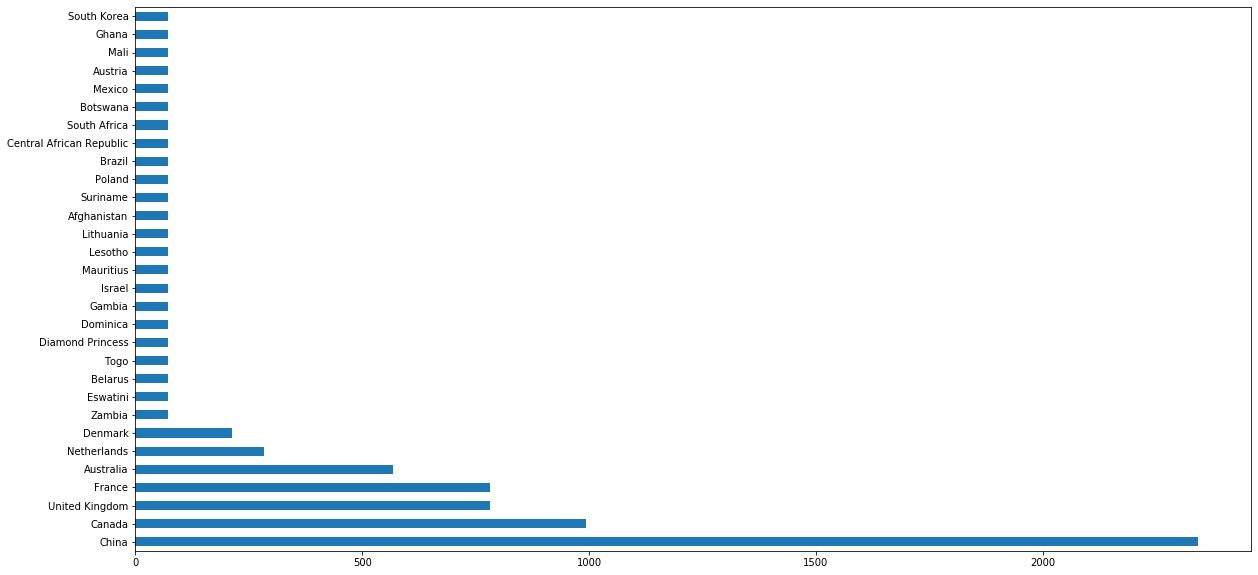

In [70]:
df['Country'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

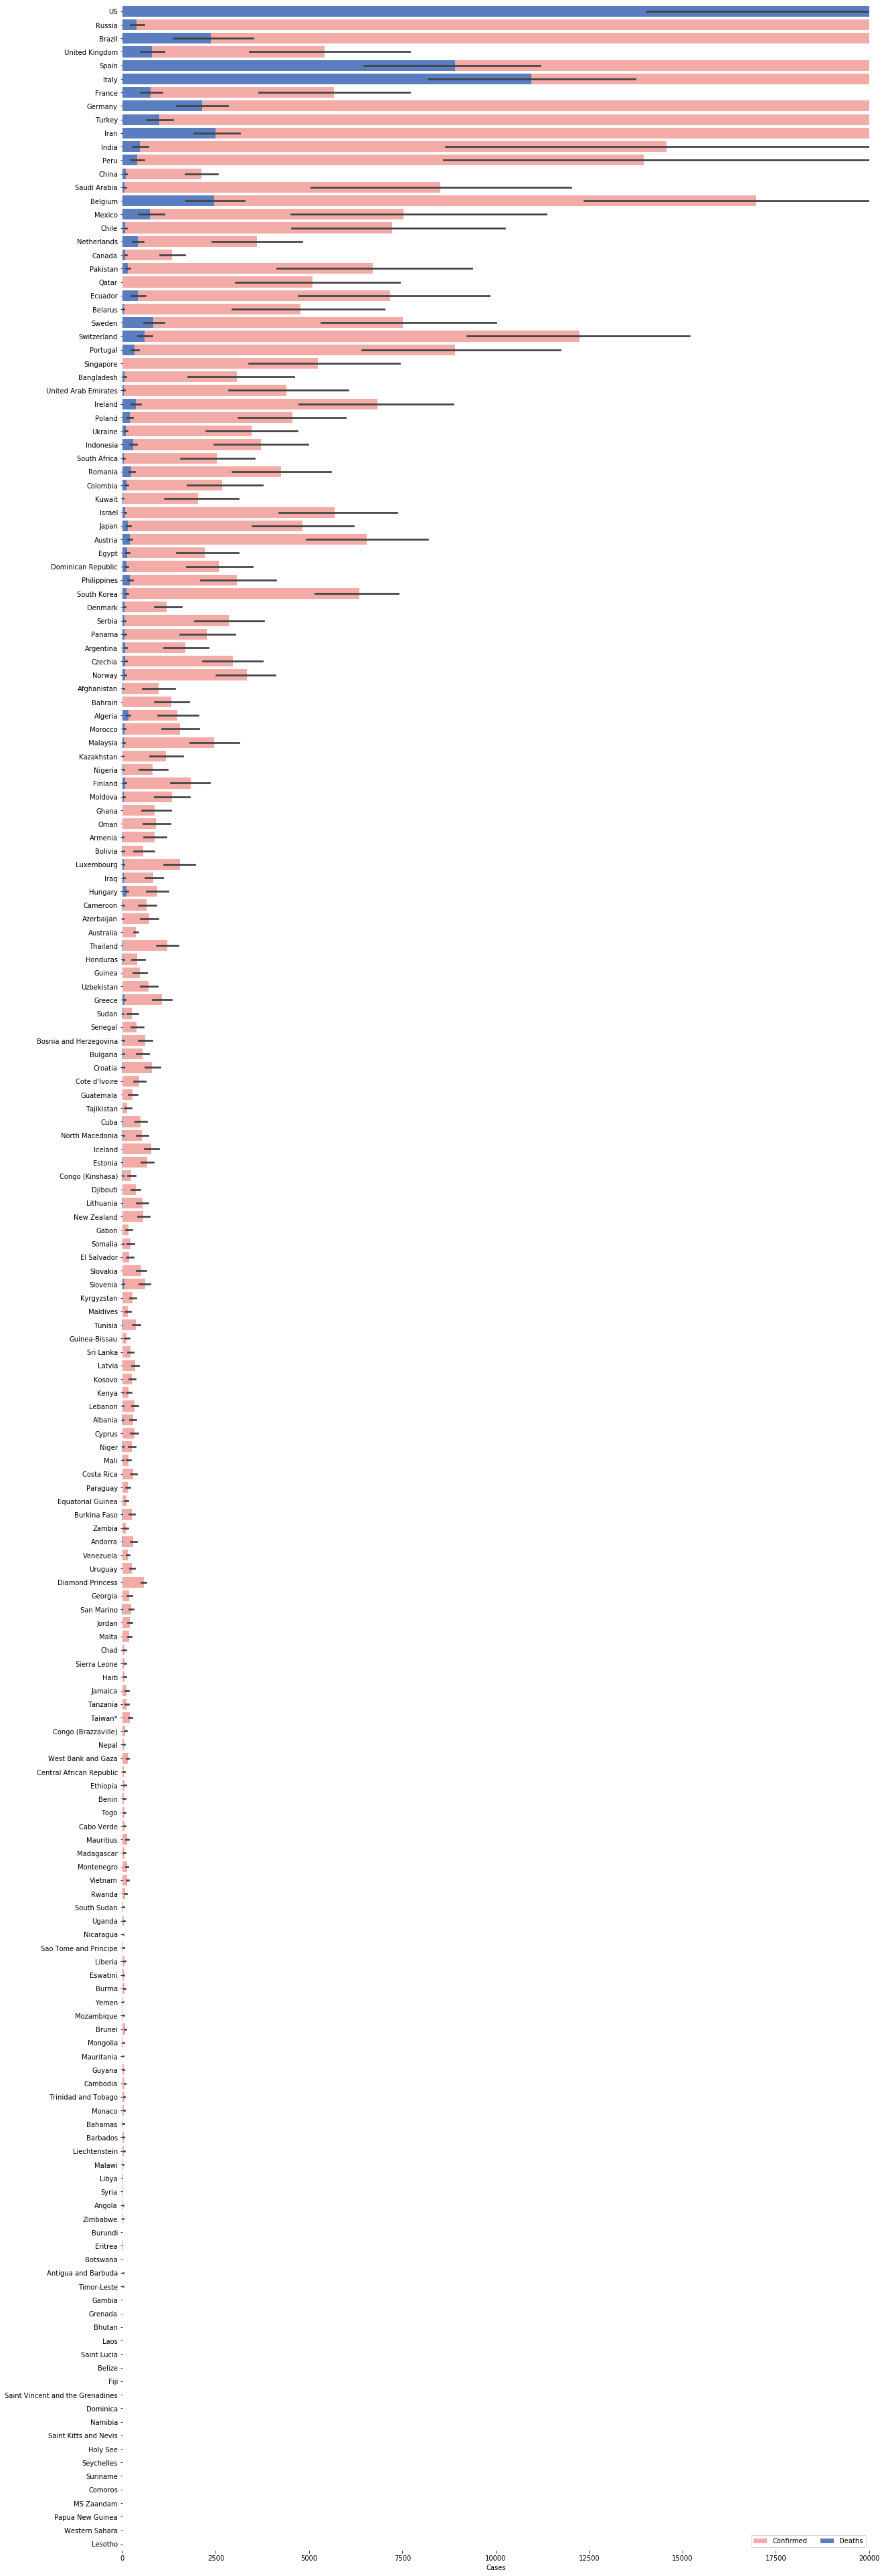

In [71]:
f, ax = plt.subplots(figsize=(20, 70))
data = df[['Country','Confirmed','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Country", data=data,label="Confirmed", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Deaths", y="Country", data=data, label="Deaths", color="b")      
       
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 20000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)


In [72]:
fig = go.Figure()
        
fig.add_trace(go.Scatter(x=df['Date'], y=df['Confirmed'], mode='lines', name='Confirmed',line=dict(color='darkviolet', width=2)))

fig.add_trace(go.Scatter(x=df['Date'], y=df['Recovered'], mode='lines', name='Recovered', line=dict(color='red', width=3)))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='blue', width=2)))
fig.update_layout(title='Worldwide COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
       
fig.show()


In [47]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()


,Province,Country,Latitude,Longitude,Date,Confirmed,Deaths,Recovered,Total Active,month
0,NaN,Afghanistan,33.0000,65.0000,28 January 2020,0,0,0,0,1
1,NaN,Albania,41.1533,20.1683,28 January 2020,0,0,0,0,1
2,NaN,Algeria,28.0339,1.6596,28 January 2020,0,0,0,0,1
3,NaN,Andorra,42.5063,1.5218,28 January 2020,0,0,0,0,1
4,NaN,Angola,-11.2027,17.8739,28 January 2020,0,0,0,0,1


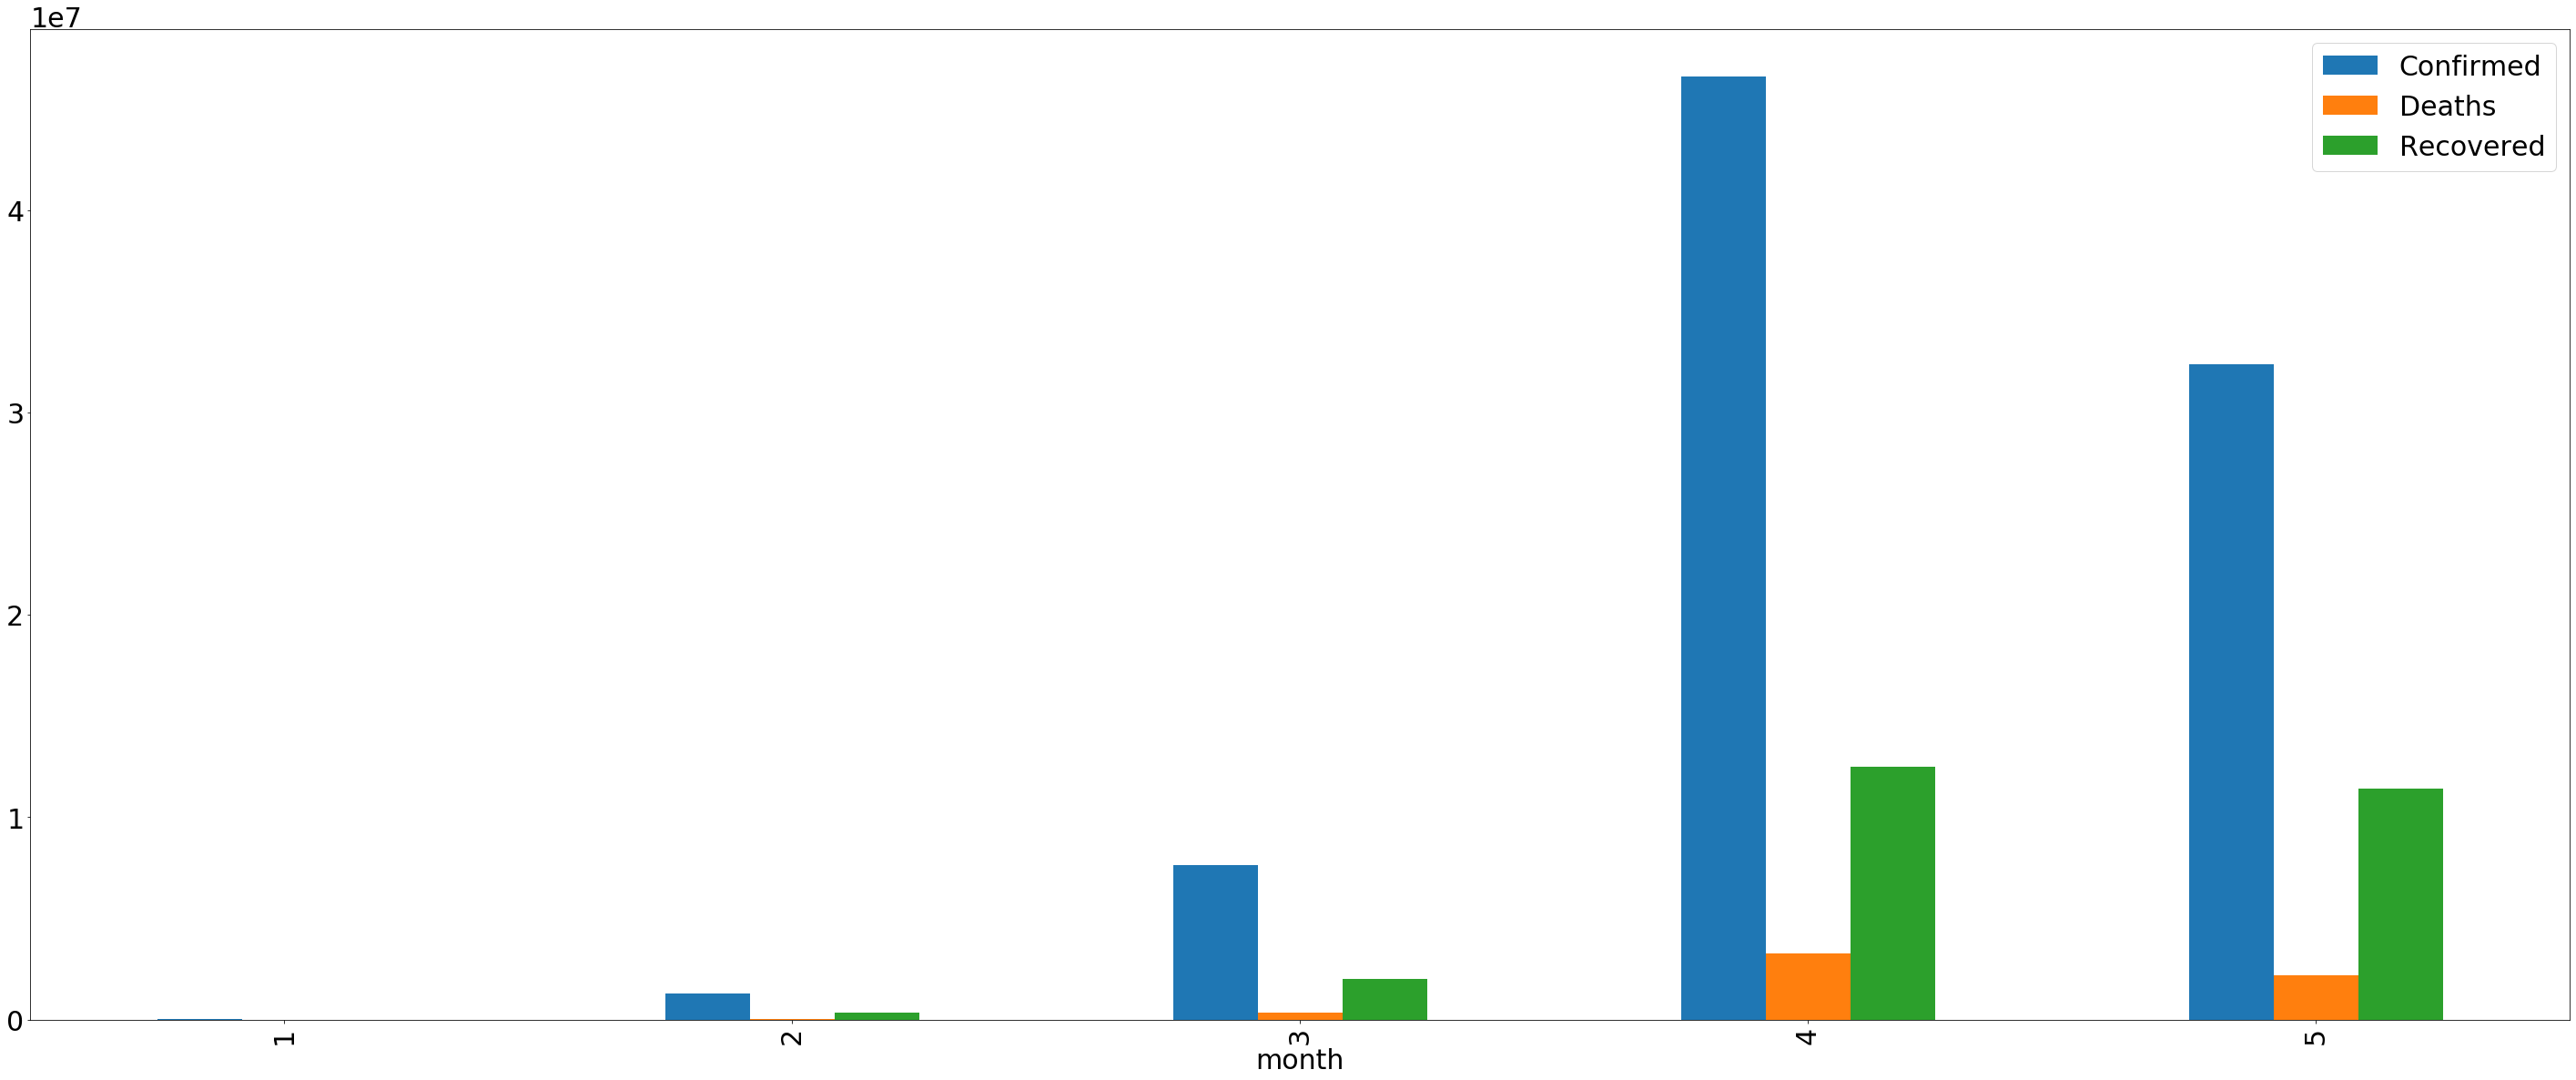

In [52]:
plt.rcParams.update({'font.size': 30})
df.groupby('month')['Confirmed','Deaths', 'Recovered'].sum().plot(kind='bar',figsize=(50,20))